In [122]:
import pandas as pd
import numpy as np
train_data=pd.read_csv(r"C:\Users\k.navadeepreddy\Downloads\fashion-mnist_train.csv")
test_data=pd.read_csv(r"C:\Users\k.navadeepreddy\Downloads\fashion-mnist_test.csv")

In [123]:
X_train=train_data.iloc[:,1:].values
y_train=train_data.iloc[:,0].values
X_test=test_data.iloc[:,1:].values
y_test=test_data.iloc[:,0].values

In [124]:
X_train=X_train/255.0
X_test=X_test/255.0

In [125]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [126]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
model=Sequential()
model.add(Conv2D(30,(3,3),activation='relu',strides=2,input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(30,(3,3),activation='relu',strides=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\k.navadeepreddy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8560 - loss: 0.3878 - val_accuracy: 0.8737 - val_loss: 0.3385
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3822 - val_accuracy: 0.8720 - val_loss: 0.3419
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8598 - loss: 0.3777 - val_accuracy: 0.8737 - val_loss: 0.3357
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8595 - loss: 0.3784 - val_accuracy: 0.8729 - val_loss: 0.3359
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8642 - loss: 0.3721 - val_accuracy: 0.8735 - val_loss: 0.3352


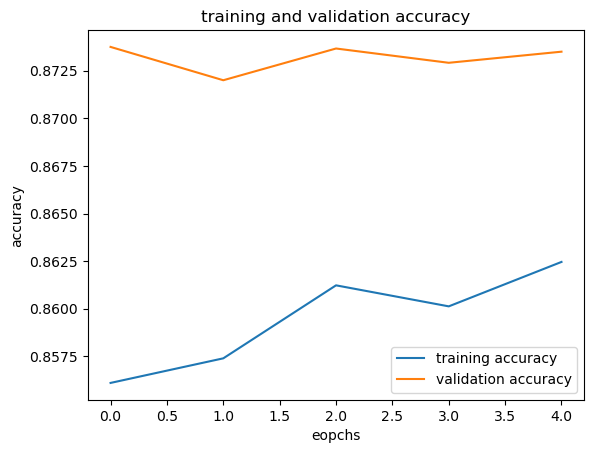

In [134]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
import matplotlib.pyplot as plt
history=model.fit(X_train,y_train,epochs=5,batch_size=128,validation_data=(X_val,y_val))
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('eopchs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

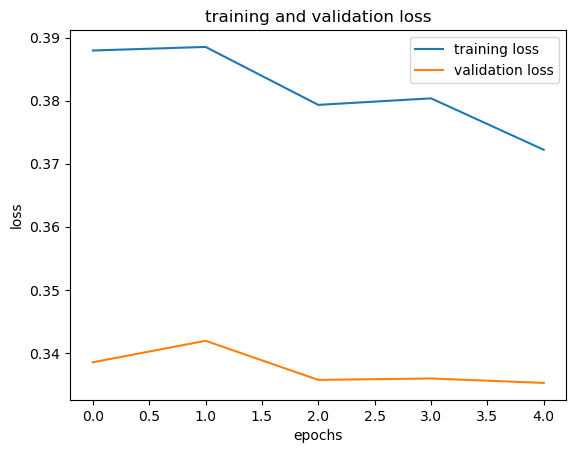

In [135]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [137]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8739 - loss: 0.3381
Test accuracy: 0.8759999871253967
